In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [367]:
# создадим несколько списков и массивов Numpy с информацией о семи странах мира
country = np.array(['China', 'Vietnam', 'United Kingdom', 'Russia', 'Argentina', 'Bolivia', 'South Africa'])
capital = ['Beijing', 'Hanoi', 'London', 'Moscow', 'Buenos Aires', 'Sucre', 'Pretoria']
population = [1400, 97, 67, 144, 45, 12, 59] # млн. человек
area = [9.6, 0.3, 0.2, 17.1, 2.8, 1.1, 1.2] # млн. кв. км.
sea = [1] * 5 + [0, 1] # выход к морю (в этом списке его нет только у Боливии)
 
# кроме того создадим список кодов стран, которые станут индексом датафрейма
custom_index = ['CN', 'VN', 'GB', 'RU', 'AR', 'BO', 'ZA']
 
# создадим пустой словарь
countries_dict = {}
 
# превратим эти списки в значения словаря,
# одновременно снабдив необходимыми ключами
countries_dict['country'] = country
countries_dict['capital'] = capital
countries_dict['population'] = population
countries_dict['area'] = area
countries_dict['sea'] = sea
 
# создадим датафрейм
countries = pd.DataFrame(countries_dict, index = custom_index)
countries

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


In [368]:
# Копирование датафрейма

In [369]:
# создадим копию, на этот раз с помощью метода .copy()
countries_new = countries.copy()
 
# вновь удалим запись про Аргентину
countries_new.drop(labels = 'AR', axis = 0, inplace = True)
 
# выведем исходный датафрейм
countries

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


In [370]:
countries_new

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


In [371]:
# параметр inplace

In [372]:
df = pd.DataFrame([[1, 1, 1],
                   [2, 2, 2],
                   [3, 3, 3]],
                   columns = ['A', 'B', 'C'])
 
df

,A,B,C
0,1,1,1
1,2,2,2
2,3,3,3


In [373]:
# попробуем удалить столбец A
df.drop(labels = ['A'], axis = 1)

,B,C
0,1,1
1,2,2
2,3,3


In [374]:
df

,A,B,C
0,1,1,1
1,2,2,2
2,3,3,3


In [375]:
# изменим параметр inplace на True
print(df.drop(labels = ['A'], axis = 1, inplace = True))

None


In [376]:
df

,B,C
0,1,1
1,2,2
2,3,3


In [377]:
# Столбцы датафрейма

In [378]:
# Именование столбцов при создании датафрейма

In [379]:
custom_columns = ['страна', 'столица', 'население', 'площадь', 'море']
arr = np.array([country, capital, population, area, sea]).T
arr

array([['China', 'Beijing', '1400', '9.6', '1'],
       ['Vietnam', 'Hanoi', '97', '0.3', '1'],
       ['United Kingdom', 'London', '67', '0.2', '1'],
       ['Russia', 'Moscow', '144', '17.1', '1'],
       ['Argentina', 'Buenos Aires', '45', '2.8', '1'],
       ['Bolivia', 'Sucre', '12', '1.1', '0'],
       ['South Africa', 'Pretoria', '59', '1.2', '1']], dtype='<U32')

In [380]:
countries = pd.DataFrame(data = arr,
                         index = custom_index,
                         columns = custom_columns)
 
countries

,страна,столица,население,площадь,море
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


In [381]:
countries.columns = ['country', 'capital', 'population', 'area', 'sea']

In [382]:
countries

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


In [383]:
# Переименование столбцов

In [384]:
# переименуем столбец capital на city
countries.rename(columns = {'capital': 'city'}, inplace = True)
countries

,country,city,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


In [385]:
# Тип данных в столбце

In [386]:
countries.dtypes

country       object
city          object
population    object
area          object
sea           object
dtype: object

In [387]:
# Изменение типа данных

In [388]:
# преобразуем тип данных столбца population в int
countries.population = countries.population.astype('int')

In [389]:
countries.dtypes

country       object
city          object
population     int32
area          object
sea           object
dtype: object

In [390]:
# изменим тип данных в столбцах area и sea
countries = countries.astype({'area': 'float', 'sea' : 'category'})

In [391]:
countries.dtypes

country         object
city            object
population       int32
area           float64
sea           category
dtype: object

In [392]:
# Тип данных category

In [393]:
# в category содержится информация об имеющихся в столбце категориях
countries.sea

CN    1
VN    1
GB    1
RU    1
AR    1
BO    0
ZA    1
Name: sea, dtype: category
Categories (2, object): ['0', '1']

In [394]:
# Фильтр столбцов по типу данных

In [395]:
# выберем только типы данных int и float
countries.select_dtypes(include = ['int32', 'float64'])

,population,area
CN,1400,9.6
VN,97,0.3
GB,67,0.2
RU,144,17.1
AR,45,2.8
BO,12,1.1
ZA,59,1.2


In [396]:
# выберем все типы данных, кроме object и category
countries.select_dtypes(exclude = ['object', 'category'])

,population,area
CN,1400,9.6
VN,97,0.3
GB,67,0.2
RU,144,17.1
AR,45,2.8
BO,12,1.1
ZA,59,1.2


In [397]:
# Добавление строк и столбцов

In [398]:
# Добавление строк

In [399]:
# Метод .append() + словарь

In [400]:
countries

,country,city,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


In [401]:
# создадим словарь с данными Канады и добавим его в датафрейм
dict = [{'country': 'Canada', 'city': 'Ottawa', 'population': 38, 'area': 10, 'sea' : '1'}]
can_df = pd.DataFrame.from_dict(dict)
countries = pd.concat([countries,can_df])
countries.reset_index(drop=True)
# словарь можно добавлять только если ignore_index = True
# countries = countries.append(dict, ignore_index = True)
# countries

,country,city,population,area,sea
0,China,Beijing,1400,9.6,1
1,Vietnam,Hanoi,97,0.3,1
2,United Kingdom,London,67,0.2,1
3,Russia,Moscow,144,17.1,1
4,Argentina,Buenos Aires,45,2.8,1
5,Bolivia,Sucre,12,1.1,0
6,South Africa,Pretoria,59,1.2,1
7,Canada,Ottawa,38,10.0,1


In [402]:
# причем, если передать список из Series, можно добавить сразу несколько строк
# list_of_series = [pd.Series(['Spain', 'Madrid', 47, 0.5, 1], index = countries.columns),
#                   pd.Series(['Netherlands', 'Amsterdam', 17, 0.04, 1], index = countries.columns)]

# нам по-прежнему необходим параметр ignore_index = True
# countries.append(list_of_series, ignore_index = True)
# countries

In [403]:
# Метод .append() + другой датафрейм

In [404]:
# новая строка может также содержаться в другом датафрейме
# обратите внимание, что числовые значения мы помещаем в списки
peru = pd.DataFrame({'country' : 'Peru',
                     'city' : 'Lima',
                     'population': [33],
                     'area' : [1.3],
                     'sea' : [1]})
peru

,country,city,population,area,sea
0,Peru,Lima,33,1.3,1


In [405]:
# перед добавлением выберем первую строку с помощью метода .iloc[]
countries = pd.concat([countries,peru], ignore_index = True)
countries

,country,city,population,area,sea
0,China,Beijing,1400,9.6,1
1,Vietnam,Hanoi,97,0.3,1
2,United Kingdom,London,67,0.2,1
3,Russia,Moscow,144,17.1,1
4,Argentina,Buenos Aires,45,2.8,1
5,Bolivia,Sucre,12,1.1,0
6,South Africa,Pretoria,59,1.2,1
7,Canada,Ottawa,38,10.0,1
8,Peru,Lima,33,1.3,1


In [406]:
# Использование .iloc[]

In [407]:
# для этого нам надо было либо перезаписать результат метода .append() в переменную countries,
# либо использовать параметр inplace = True.
countries.reset_index(drop=True, inplace=True)
countries['sea'] = countries['sea'].astype('object')
countries

,country,city,population,area,sea
0,China,Beijing,1400,9.6,1
1,Vietnam,Hanoi,97,0.3,1
2,United Kingdom,London,67,0.2,1
3,Russia,Moscow,144,17.1,1
4,Argentina,Buenos Aires,45,2.8,1
5,Bolivia,Sucre,12,1.1,0
6,South Africa,Pretoria,59,1.2,1
7,Canada,Ottawa,38,10.0,1
8,Peru,Lima,33,1.3,1


In [408]:
countries.iloc[[4, 5, 6]] = [['Spain', 'Madrid', 47, 0.5, 1],
                             ['Netherlands', 'Amsterdam', 17, 0.04, 1],
                             ['Peru', 'Lima', 33, 1.3, 1]]
 
countries

,country,city,population,area,sea
0,China,Beijing,1400,9.60,1
1,Vietnam,Hanoi,97,0.30,1
2,United Kingdom,London,67,0.20,1
3,Russia,Moscow,144,17.10,1
4,Spain,Madrid,47,0.50,1
5,Netherlands,Amsterdam,17,0.04,1
6,Peru,Lima,33,1.30,1
7,Canada,Ottawa,38,10.00,1
8,Peru,Lima,33,1.30,1


In [409]:
#Добавление столбцов

In [410]:
# Объявление нового столбца

In [411]:
# например, добавим данные о плотности населения
countries['pop_density'] = [153, 49, 281, 9, 17, 94, 508,205,301]
countries

,country,city,population,area,sea,pop_density
0,China,Beijing,1400,9.60,1,153
1,Vietnam,Hanoi,97,0.30,1,49
2,United Kingdom,London,67,0.20,1,281
3,Russia,Moscow,144,17.10,1,9
4,Spain,Madrid,47,0.50,1,17
5,Netherlands,Amsterdam,17,0.04,1,94
6,Peru,Lima,33,1.30,1,508
7,Canada,Ottawa,38,10.00,1,205
8,Peru,Lima,33,1.30,1,301


In [412]:
# Метод .insert()
# Добавим столбец с кодами стран с помощью метода .insert().

In [413]:
countries.insert(loc = 1, # это будет второй по счету столбец
                 column = 'code', # название столбца
                 value = ['CN', 'VN', 'GB', 'RU', 'ES', 'NL', 'PE','CA','PE']) # значения столбца


In [414]:
countries

,country,code,city,population,area,sea,pop_density
0,China,CN,Beijing,1400,9.60,1,153
1,Vietnam,VN,Hanoi,97,0.30,1,49
2,United Kingdom,GB,London,67,0.20,1,281
3,Russia,RU,Moscow,144,17.10,1,9
4,Spain,ES,Madrid,47,0.50,1,17
5,Netherlands,NL,Amsterdam,17,0.04,1,94
6,Peru,PE,Lima,33,1.30,1,508
7,Canada,CA,Ottawa,38,10.00,1,205
8,Peru,PE,Lima,33,1.30,1,301


In [415]:
# Метод .assign()

In [416]:
countries = countries.assign(area_miles = countries.area / 2.59).round(2)
countries

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.60,1,153,3.71
1,Vietnam,VN,Hanoi,97,0.30,1,49,0.12
2,United Kingdom,GB,London,67,0.20,1,281,0.08
3,Russia,RU,Moscow,144,17.10,1,9,6.60
4,Spain,ES,Madrid,47,0.50,1,17,0.19
5,Netherlands,NL,Amsterdam,17,0.04,1,94,0.02
6,Peru,PE,Lima,33,1.30,1,508,0.50
7,Canada,CA,Ottawa,38,10.00,1,205,3.86
8,Peru,PE,Lima,33,1.30,1,301,0.50


In [417]:
countries.drop(labels = 'area_miles', axis = 1, inplace = True)

In [418]:
# выведем индекс и содержание строк
for index, row in countries.iterrows():
  # запишем для каждой строки (index) в новый столбец area_miles
  # округленное значение площади row.area в милях
  countries.loc[index, 'area_miles'] = np.round(row.area / 2.59, 2)
 
# посмотрим на результат
countries

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.60,1,153,3.71
1,Vietnam,VN,Hanoi,97,0.30,1,49,0.12
2,United Kingdom,GB,London,67,0.20,1,281,0.08
3,Russia,RU,Moscow,144,17.10,1,9,6.60
4,Spain,ES,Madrid,47,0.50,1,17,0.19
5,Netherlands,NL,Amsterdam,17,0.04,1,94,0.02
6,Peru,PE,Lima,33,1.30,1,508,0.50
7,Canada,CA,Ottawa,38,10.00,1,205,3.86
8,Peru,PE,Lima,33,1.30,1,301,0.50


In [419]:
# снова удалим этот столбец
countries.drop(labels = 'area_miles', axis = 1, inplace = True)

In [420]:
# мы можем объявить столбец и присвоить ему нужно нам значение
countries['area_miles'] = (countries.area / 2.59).round(2)
countries

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.60,1,153,3.71
1,Vietnam,VN,Hanoi,97,0.30,1,49,0.12
2,United Kingdom,GB,London,67,0.20,1,281,0.08
3,Russia,RU,Moscow,144,17.10,1,9,6.60
4,Spain,ES,Madrid,47,0.50,1,17,0.19
5,Netherlands,NL,Amsterdam,17,0.04,1,94,0.02
6,Peru,PE,Lima,33,1.30,1,508,0.50
7,Canada,CA,Ottawa,38,10.00,1,205,3.86
8,Peru,PE,Lima,33,1.30,1,301,0.50


In [421]:
# Удаление строк и столбцов

In [422]:
# удалим строки с индексом 0 и 1
countries.drop(labels = [0, 1], axis = 0)

,country,code,city,population,area,sea,pop_density,area_miles
2,United Kingdom,GB,London,67,0.20,1,281,0.08
3,Russia,RU,Moscow,144,17.10,1,9,6.60
4,Spain,ES,Madrid,47,0.50,1,17,0.19
5,Netherlands,NL,Amsterdam,17,0.04,1,94,0.02
6,Peru,PE,Lima,33,1.30,1,508,0.50
7,Canada,CA,Ottawa,38,10.00,1,205,3.86
8,Peru,PE,Lima,33,1.30,1,301,0.50


In [423]:
# удалим строки с индексом 5 и 7
countries.drop(index = [5, 6])

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.6,1,153,3.71
1,Vietnam,VN,Hanoi,97,0.3,1,49,0.12
2,United Kingdom,GB,London,67,0.2,1,281,0.08
3,Russia,RU,Moscow,144,17.1,1,9,6.60
4,Spain,ES,Madrid,47,0.5,1,17,0.19
7,Canada,CA,Ottawa,38,10.0,1,205,3.86
8,Peru,PE,Lima,33,1.3,1,301,0.50


In [424]:
# удалим четвертую строку
countries.drop(index = countries.index[4])

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.60,1,153,3.71
1,Vietnam,VN,Hanoi,97,0.30,1,49,0.12
2,United Kingdom,GB,London,67,0.20,1,281,0.08
3,Russia,RU,Moscow,144,17.10,1,9,6.60
5,Netherlands,NL,Amsterdam,17,0.04,1,94,0.02
6,Peru,PE,Lima,33,1.30,1,508,0.50
7,Canada,CA,Ottawa,38,10.00,1,205,3.86
8,Peru,PE,Lima,33,1.30,1,301,0.50


In [425]:
# удалим каждую вторую строку, начиная с четвертой с конца
countries.drop(index = countries.index[-4::2])

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.6,1,153,3.71
1,Vietnam,VN,Hanoi,97,0.3,1,49,0.12
2,United Kingdom,GB,London,67,0.2,1,281,0.08
3,Russia,RU,Moscow,144,17.1,1,9,6.60
4,Spain,ES,Madrid,47,0.5,1,17,0.19
6,Peru,PE,Lima,33,1.3,1,508,0.50
8,Peru,PE,Lima,33,1.3,1,301,0.50


In [426]:
# Удаление столбцов

In [427]:
# удалим столбцы area_miles и code
countries.drop(labels = ['area_miles', 'code'], axis = 1)

,country,city,population,area,sea,pop_density
0,China,Beijing,1400,9.60,1,153
1,Vietnam,Hanoi,97,0.30,1,49
2,United Kingdom,London,67,0.20,1,281
3,Russia,Moscow,144,17.10,1,9
4,Spain,Madrid,47,0.50,1,17
5,Netherlands,Amsterdam,17,0.04,1,94
6,Peru,Lima,33,1.30,1,508
7,Canada,Ottawa,38,10.00,1,205
8,Peru,Lima,33,1.30,1,301


In [428]:
# снова удалим столбцы area_miles и code
countries.drop(columns = ['area_miles', 'code'])

,country,city,population,area,sea,pop_density
0,China,Beijing,1400,9.60,1,153
1,Vietnam,Hanoi,97,0.30,1,49
2,United Kingdom,London,67,0.20,1,281
3,Russia,Moscow,144,17.10,1,9
4,Spain,Madrid,47,0.50,1,17
5,Netherlands,Amsterdam,17,0.04,1,94
6,Peru,Lima,33,1.30,1,508
7,Canada,Ottawa,38,10.00,1,205
8,Peru,Lima,33,1.30,1,301


In [429]:
# удалим последний столбец (area_miles)
countries.drop(columns = countries.columns[-1])

,country,code,city,population,area,sea,pop_density
0,China,CN,Beijing,1400,9.60,1,153
1,Vietnam,VN,Hanoi,97,0.30,1,49
2,United Kingdom,GB,London,67,0.20,1,281
3,Russia,RU,Moscow,144,17.10,1,9
4,Spain,ES,Madrid,47,0.50,1,17
5,Netherlands,NL,Amsterdam,17,0.04,1,94
6,Peru,PE,Lima,33,1.30,1,508
7,Canada,CA,Ottawa,38,10.00,1,205
8,Peru,PE,Lima,33,1.30,1,301


In [430]:
countries.drop(columns = ['code', 'pop_density', 'area_miles'], inplace = True)
countries

,country,city,population,area,sea
0,China,Beijing,1400,9.60,1
1,Vietnam,Hanoi,97,0.30,1
2,United Kingdom,London,67,0.20,1
3,Russia,Moscow,144,17.10,1
4,Spain,Madrid,47,0.50,1
5,Netherlands,Amsterdam,17,0.04,1
6,Peru,Lima,33,1.30,1
7,Canada,Ottawa,38,10.00,1
8,Peru,Lima,33,1.30,1


In [431]:
countries.drop(index=[7,8], inplace=True,axis=0)
countries

,country,city,population,area,sea
0,China,Beijing,1400,9.60,1
1,Vietnam,Hanoi,97,0.30,1
2,United Kingdom,London,67,0.20,1
3,Russia,Moscow,144,17.10,1
4,Spain,Madrid,47,0.50,1
5,Netherlands,Amsterdam,17,0.04,1
6,Peru,Lima,33,1.30,1


In [432]:
# Удаление по многоуровнему индексу

In [433]:
# подготовим данные для многоуровневого индекса строк
rows = [('Asia', 'CN'),
        ('Asia', 'VN'),
        ('Europe', 'GB'),
        ('Europe', 'RU'),
        ('Europe', 'ES'),
        ('Europe', 'NL'),
        ('S. America', 'PE')]
 
# и столбцов
cols = [('names', 'country'),
        ('names', 'city'),
        ('data', 'population'),
        ('data', 'area'),
        ('data', 'sea')]
 
# создадим многоуровневый (иерархический) индекс
# для индекса строк добавим названия столбцов индекса через параметр names
custom_multindex = pd.MultiIndex.from_tuples(rows, names = ['region', 'code'])
custom_multicols = pd.MultiIndex.from_tuples(cols)
 
# поместим индексы в атрибуты index и columns датафрейма
countries.index = custom_multindex
countries.columns = custom_multicols
 
# посмотрим на результат
countries

names                  data           
                        country       city population   area sea
region     code                                                 
Asia       CN             China    Beijing       1400   9.60   1
           VN           Vietnam      Hanoi         97   0.30   1
Europe     GB    United Kingdom     London         67   0.20   1
           RU            Russia     Moscow        144  17.10   1
           ES             Spain     Madrid         47   0.50   1
           NL       Netherlands  Amsterdam         17   0.04   1
S. America PE              Peru       Lima         33   1.30   1

In [434]:
countries.drop(labels = 'Asia', axis = 0, level = 0)

names                  data           
                        country       city population   area sea
region     code                                                 
Europe     GB    United Kingdom     London         67   0.20   1
           RU            Russia     Moscow        144  17.10   1
           ES             Spain     Madrid         47   0.50   1
           NL       Netherlands  Amsterdam         17   0.04   1
S. America PE              Peru       Lima         33   1.30   1

In [435]:
# удалим запись о России по ее индексу в столбце code (т.е. level = 1)
countries.drop(index = 'RU', level = 1)

names                  data          
                        country       city population  area sea
region     code                                                
Asia       CN             China    Beijing       1400  9.60   1
           VN           Vietnam      Hanoi         97  0.30   1
Europe     GB    United Kingdom     London         67  0.20   1
           ES             Spain     Madrid         47  0.50   1
           NL       Netherlands  Amsterdam         17  0.04   1
S. America PE              Peru       Lima         33  1.30   1

In [436]:
# удалим все столбцы в разделе names на нулевом уровне индекса столбцов
countries.drop(labels = 'names', level = 0, axis = 1)

data           
                population   area sea
region     code                      
Asia       CN         1400   9.60   1
           VN           97   0.30   1
Europe     GB           67   0.20   1
           RU          144  17.10   1
           ES           47   0.50   1
           NL           17   0.04   1
S. America PE           33   1.30   1

In [437]:
# например, удалим столбцы city и area на втором уровне (level = 1) индекса
countries.drop(columns = ['city', 'area'], level = 1)

names       data    
                        country population sea
region     code                               
Asia       CN             China       1400   1
           VN           Vietnam         97   1
Europe     GB    United Kingdom         67   1
           RU            Russia        144   1
           ES             Spain         47   1
           NL       Netherlands         17   1
S. America PE              Peru         33   1

In [438]:
# применение функций

In [439]:
# создадим новый датафрейм с данными нескольких человек
people = pd.DataFrame({'name'        : ['Алексей', 'Иван', 'Анна', 'Ольга', 'Николай'],
                       'gender'      : [1, 1, 0, 2, 1],
                       'age'         : [35, 20, 13, 28, 16],
                       'height'      : [180.46, 182.26, 165.12, 168.04, 178.68],
                       'weight'      : [73.61, 75.34, 50.22, 52.14, 69.72]
                       })
 
people

,name,gender,age,height,weight
0,Алексей,1,35,180.46,73.61
1,Иван,1,20,182.26,75.34
2,Анна,0,13,165.12,50.22
3,Ольга,2,28,168.04,52.14
4,Николай,1,16,178.68,69.72


In [440]:
# Метод .map()

In [441]:
# такая карта представляет собой питоновский словарь,
# где ключи - это старые данные, а значения - новые
gender_map = {0: 'female', 1 : 'male'}

In [442]:
people['gender'] = people['gender'].map(gender_map)
people

,name,gender,age,height,weight
0,Алексей,male,35,180.46,73.61
1,Иван,male,20,182.26,75.34
2,Анна,female,13,165.12,50.22
3,Ольга,NaN,28,168.04,52.14
4,Николай,male,16,178.68,69.72


In [443]:
# например, для того, чтобы выявить совершеннолетних и несовершеннолетних людей
people['age_group'] = people['age'].map(lambda x: 'adult' if x >= 18 else 'minor')
people

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,adult
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


In [444]:
people.drop(labels = 'age_group', axis = 1, inplace = True)
people

,name,gender,age,height,weight
0,Алексей,male,35,180.46,73.61
1,Иван,male,20,182.26,75.34
2,Анна,female,13,165.12,50.22
3,Ольга,NaN,28,168.04,52.14
4,Николай,male,16,178.68,69.72


In [445]:
def get_age_group(age):
    threshold = 18

    if age >= threshold:
        age_group = 'adult'
    else:
        age_group= 'minor'

    return age_group

In [446]:
people['age_group'] = people['age'].map(get_age_group)

In [447]:
people

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,adult
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


In [448]:
# снова удалим созданный столбец
people.drop(labels = 'age_group', axis = 1, inplace = True)

In [449]:
# внутри функции np.where() три параметра: (1) условие,
# (2) значение, если условие выдает True, (3) и значение, если условие выдает False
people['age_group'] = np.where(people['age'] >= 18, 'adult', 'minor')
people

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,adult
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


In [450]:
people.age.where(people.age >=18, other = np.nan)

0    35.0
1    20.0
2     NaN
3    28.0
4     NaN
Name: age, dtype: float64

In [451]:
# создадим матрицу из вложенных списков
nums_matrix = [[-13, 7, 1],
               [4, -2, 25],
               [45, -3, 8]]
 
# преобразуем в датафрейм
# (матрица не обязательно должна быть массивом Numpy (!))
nums = pd.DataFrame(nums_matrix)
nums

,0,1,2
0,-13,7,1
1,4,-2,25
2,45,-3,8


In [452]:
# если число положительное (nums < 0 == True), оставим его без изменений
# если отрицательное (False), заменим на обратное (т.е. сделаем положительным)
nums.where(nums > 0, other = -nums)

,0,1,2
0,13,7,1
1,4,2,25
2,45,3,8


In [453]:
# Метод .apply()

In [454]:
# объявим функцию, которой можно передать не только значение возраста, но и порог,при котором мы будем считать человека совершеннолетним
def get_age_group(age, threshold):
    if age >= int(threshold):
        age_group = 'adult'
    else:
        age_group = 'minor'
    return age_group

In [455]:
# применим эту функцию к столбцу age, выбрав в качестве порогового значения 21 год
people['age_group'] = people['age'].apply(get_age_group, threshold = 21)
# посмотрим на результат
people

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,minor
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


In [456]:
# Применение к столбцам

In [457]:
# заменим значения в столбцах height и weight на медиану по столбцам
# people[['height', 'weight']] = people[['height', 'weight']].apply(np.median, axis = 0)
# people

In [458]:
# Применение к строкам

In [459]:
# внутри функции разделим вес на квадрат роста
def get_bmi(x):
    bmi = x['weight'] / (x['height'] / 100) ** 2
    return bmi

In [460]:
# для применения функции к строке используется параметр axis = 1
people['bmi'] = people.apply(get_bmi, axis = 1).round(2)
people

,name,gender,age,height,weight,age_group,bmi
0,Алексей,male,35,180.46,73.61,adult,22.60
1,Иван,male,20,182.26,75.34,minor,22.68
2,Анна,female,13,165.12,50.22,minor,18.42
3,Ольга,NaN,28,168.04,52.14,adult,18.46
4,Николай,male,16,178.68,69.72,minor,21.84


In [461]:
# Метод .applymap()

In [462]:
# Метод .applymap() позволяет применять функции с именованными аргументами ко всему датафрейму (метод .apply() применяется только к строкам или столбцам). Рассмотрим несложный пример.

In [463]:
# создадим датафрейм из чисел
nums_matrix = [[13, 7, 1],
               [4, 2, 25],
               [45, 3, 8]]
 
nums = pd.DataFrame(nums_matrix)
nums

,0,1,2
0,13,7,1
1,4,2,25
2,45,3,8


In [464]:
# объявим функцию, которая на входе принимает число x и прибавляет к нему другое число, указанное в параметре number.
def add_number(x, number):
  return x + number

In [466]:
# передадим методу .applymap() функцию add_number и прибавим единицу к каждому элементу датафрейма.
nums.applymap(add_number, number = 6)

C:\Users\Alex\AppData\Local\Temp\ipykernel_13800\211629905.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nums.applymap(add_number, number = 6)


,0,1,2
0,19,13,7
1,10,8,31
2,51,9,14


In [467]:
# Метод .pipe()

In [468]:
# Метод .pipe(), как следует из его названия, позволяет создать pipeline и последовательно применить несколько функций к датафрейму. Вновь создадим исходный датафрейм с параметрами нескольких людей.

In [469]:
people = pd.DataFrame({'name'        : ['Алексей', 'Иван', 'Анна', 'Ольга', 'Николай'],
                       'gender'      : [1, 1, 0, 2, 1],
                       'age'         : [35, 20, 13, 28, 16],
                       'height'      : [180.46, 182.26, 165.12, 168.04, 178.68],
                       'weight'      : [73.61, 75.34, 50.22, 52.14, 69.72]
                       })
 
people

,name,gender,age,height,weight
0,Алексей,1,35,180.46,73.61
1,Иван,1,20,182.26,75.34
2,Анна,0,13,165.12,50.22
3,Ольга,2,28,168.04,52.14
4,Николай,1,16,178.68,69.72


In [470]:
# в первую очередь скопируем датафрейм
def copy_df(df):
   return df.copy()
 
# заменим значения столбца на новые с помощью метода .map() 
def map_column(df, column, label1, label2):
  labels_map = {0: label1, 1 : label2}
  df[column] = df[column].map(labels_map)
  return df
 
# кроме этого, создадим функцию для превращения количественной переменной
# в бинарную категориальную
def to_categorical(df, newcol, condcol, thres, cat1, cat2):
  df[newcol] = np.where(df[condcol] >= thres, cat1, cat2)
  return df

In [471]:
people_processed = (people.
                    pipe(copy_df). # copy_df() применится ко всему датафрейму
                    pipe(map_column, 'gender', 'female', 'male'). # map_column() к столбцу gender
                    pipe(to_categorical, 'age_group', 'age', 18, 'adult', 'minor')) # to_categorical() к age_group


In [472]:
people_processed

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,adult
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


In [473]:
people

,name,gender,age,height,weight
0,Алексей,1,35,180.46,73.61
1,Иван,1,20,182.26,75.34
2,Анна,0,13,165.12,50.22
3,Ольга,2,28,168.04,52.14
4,Николай,1,16,178.68,69.72


In [474]:
# Соединение датафреймов

In [475]:
# Рассмотрим, как мы можем соединить два датафрейма с помощью функций/методов pd.concat(), pd.merge() и .join(). Начнем с функции pd.concat().

In [476]:
# pd.concat()

In [477]:
s1 = pd.DataFrame({
  'item': ['карандаш', 'ручка', 'папка', 'степлер'],
  'price': [220, 340, 200, 500]
})
 
s2 = pd.DataFrame({
  'item': ['клей', 'корректор', 'скрепка', 'бумага'],
  'price': [200, 240, 100, 300]
})

In [479]:
s1

,item,price
0,карандаш,220
1,ручка,340
2,папка,200
3,степлер,500


In [480]:
s2

,item,price
0,клей,200
1,корректор,240
2,скрепка,100
3,бумага,300


In [481]:
# передадим в функцию pd.concat() список из соединяемых датафреймов,
# укажем параметр axis = 0
pd.concat([s1, s2], axis = 0)

,item,price
0,карандаш,220
1,ручка,340
2,папка,200
3,степлер,500
0,клей,200
1,корректор,240
2,скрепка,100
3,бумага,300


In [482]:
# обновим индекс через параметр ignore_index = True
pd.concat([s1, s2], axis = 0, ignore_index = True)

,item,price
0,карандаш,220
1,ручка,340
2,папка,200
3,степлер,500
4,клей,200
5,корректор,240
6,скрепка,100
7,бумага,300


In [483]:
# передадим в параметр keys названия групп индекса,
# параметр names получим названия уровней индекса
by_shop = pd.concat([s1, s2], axis = 0, keys = ['s1', 's2'], names = ['s', 'id'])
by_shop

item  price
s  id                  
s1 0    карандаш    220
   1       ручка    340
   2       папка    200
   3     степлер    500
s2 0        клей    200
   1   корректор    240
   2     скрепка    100
   3      бумага    300

In [485]:
by_shop.index

MultiIndex([('s1', 0),
            ('s1', 1),
            ('s1', 2),
            ('s1', 3),
            ('s2', 0),
            ('s2', 1),
            ('s2', 2),
            ('s2', 3)],
           names=['s', 'id'])

In [487]:
by_shop.loc[('s1',0)]

item     карандаш
price         220
Name: (s1, 0), dtype: object

In [488]:
# для этого сразу используем параметр axis = 1
# одновременно сразу создадим группы для многоуровневого индекса столбцов
pd.concat([s1, s2], axis = 1, keys = ['s1', 's2'])

s1               s2      
       item price       item price
0  карандаш   220       клей   200
1     ручка   340  корректор   240
2     папка   200    скрепка   100
3   степлер   500     бумага   300

In [489]:
pd.concat([s1, s2], axis = 1, keys = ['s1', 's2']).loc[:,'s2']

,item,price
0,клей,200
1,корректор,240
2,скрепка,100
3,бумага,300


In [491]:
# для транспонирования датафрейма используется метод .T или .transpose()
pd.concat([s1, s2], axis = 1, keys = ['s1', 's2']).T

0          1        2        3
s1 item   карандаш      ручка    папка  степлер
   price       220        340      200      500
s2 item       клей  корректор  скрепка   бумага
   price       200        240      100      300

In [492]:
math_dict = {
  'name': ['Андрей', 'Елена', 'Антон', 'Татьяна'],
  'math_score' : [83, 84, 78, 80]
}
 
math_degree_dict = {
    'degree' : ['B', 'M', 'B', 'M']
}
 
cs_dict = {
  'name': ['Андрей', 'Ольга', 'Евгений', 'Татьяна'],
  'cs_score' : [87, 82, 77, 81]
}
 
math = pd.DataFrame(math_dict)
cs = pd.DataFrame(cs_dict)
math_degree = pd.DataFrame(math_degree_dict)

In [493]:
math

,name,math_score
0,Андрей,83
1,Елена,84
2,Антон,78
3,Татьяна,80


In [494]:
math_degree

,degree
0,B
1,M
2,B
3,M


In [495]:
cs

,name,cs_score
0,Андрей,87
1,Ольга,82
2,Евгений,77
3,Татьяна,81


In [496]:
# Left join

In [497]:
pd.merge(math, math_degree, # выполним соединение двух датафреймов
         how = 'left', # способом left join
         left_index = True, right_index = True) # по индексам левого и правого датафрейма


,name,math_score,degree
0,Андрей,83,B
1,Елена,84,M
2,Антон,78,B
3,Татьяна,80,M


In [498]:
# можно сказать, что .join() "заточен" под left join по индексу
math.join(math_degree)

,name,math_score,degree
0,Андрей,83,B
1,Елена,84,M
2,Антон,78,B
3,Татьяна,80,M


In [499]:
# выполним left join по столбцу name
pd.merge(math, cs, how = 'left', on = 'name')

,name,math_score,cs_score
0,Андрей,83,87.0
1,Елена,84,NaN
2,Антон,78,NaN
3,Татьяна,80,81.0


In [500]:
# Left excluding join

In [501]:
pd.merge(math, cs, how = 'left', on = 'name', indicator = True)

,name,math_score,cs_score,_merge
0,Андрей,83,87.0,both
1,Елена,84,NaN,left_only
2,Антон,78,NaN,left_only
3,Татьяна,80,81.0,both


In [502]:
# все это можно сделать, применив несколько методов подряд
pd.merge(math, cs, how = 'left', on = 'name', indicator = True) \
    .query('_merge == "left_only"').drop(columns = '_merge')

,name,math_score,cs_score
1,Елена,84,NaN
2,Антон,78,NaN


In [503]:
pd.merge(math, cs, how = 'right', on = 'name')

,name,math_score,cs_score
0,Андрей,83.0,87
1,Ольга,NaN,82
2,Евгений,NaN,77
3,Татьяна,80.0,81


In [504]:
# Right excluding join

In [505]:
pd.merge(math, cs, how = 'right', on = 'name', indicator = True)

,name,math_score,cs_score,_merge
0,Андрей,83.0,87,both
1,Ольга,NaN,82,right_only
2,Евгений,NaN,77,right_only
3,Татьяна,80.0,81,both


In [506]:
pd.merge(math, cs, how = 'right', on = 'name', indicator = True) \
    .query('_merge == "right_only"').drop(columns = '_merge')

,name,math_score,cs_score
1,Ольга,NaN,82
2,Евгений,NaN,77


In [507]:
# Outer join

In [508]:
pd.merge(math, cs, how = 'outer', on = 'name')

,name,math_score,cs_score
0,Андрей,83.0,87.0
1,Антон,78.0,NaN
2,Евгений,NaN,77.0
3,Елена,84.0,NaN
4,Ольга,NaN,82.0
5,Татьяна,80.0,81.0


In [509]:
# Full excluding join

In [510]:
pd.merge(math, cs, on = 'name', how = 'outer', indicator = True)

,name,math_score,cs_score,_merge
0,Андрей,83.0,87.0,both
1,Антон,78.0,NaN,left_only
2,Евгений,NaN,77.0,right_only
3,Елена,84.0,NaN,left_only
4,Ольга,NaN,82.0,right_only
5,Татьяна,80.0,81.0,both


In [511]:
pd.merge(math, cs, on = 'name', how = 'outer', indicator = True) \
  .query('_merge != "both"') \
  .drop(columns = '_merge')

,name,math_score,cs_score
1,Антон,78.0,NaN
2,Евгений,NaN,77.0
3,Елена,84.0,NaN
4,Ольга,NaN,82.0


In [512]:
# Inner join

In [513]:
# для внутреннего соединения используется параметр how = 'inner'
pd.merge(math, cs, how = 'inner', on = 'name')

,name,math_score,cs_score
0,Андрей,83,87
1,Татьяна,80,81


In [514]:
pd.merge(math, cs)

,name,math_score,cs_score
0,Андрей,83,87
1,Татьяна,80,81


In [515]:
# Соединение датафреймов и дубликаты

In [517]:
# Первый пример

In [518]:
product_data = pd.DataFrame([[1, 'холодильник'], [2, 'телевизор']], columns = ['code', 'product'])
price_data = pd.DataFrame([[1, 40000], [1, 60000]], columns = ['code', 'price'])

In [519]:
product_data

,code,product
0,1,холодильник
1,2,телевизор


In [520]:
price_data

,code,price
0,1,40000
1,1,60000


In [521]:
pd.merge(product_data,price_data,how='left',on='code')

,code,product,price
0,1,холодильник,40000.0
1,1,холодильник,60000.0
2,2,телевизор,NaN


In [522]:
pd.merge(product_data, price_data, how = 'right', on = 'code')

,code,product,price
0,1,холодильник,40000
1,1,холодильник,60000


In [523]:
# Второй пример

In [524]:
# создадим два датафрейма
exams_dict = {
  'professor': ['Погорельцев', 'Преображенский', 'Архенгельский', 'Дятлов', 'Иванов'],
  'student' : [101, 102, 103, 104, 101],
  'score' : [83, 84, 78, 80, 82]
}
 
students_dict = {
  'student_id' : [101, 102, 103, 104],
  'student': ['Андрей', 'Елена', 'Антон', 'Татьяна']
 
}
 
exams = pd.DataFrame(exams_dict)
students = pd.DataFrame(students_dict)

In [525]:
exams

,professor,student,score
0,Погорельцев,101,83
1,Преображенский,102,84
2,Архенгельский,103,78
3,Дятлов,104,80
4,Иванов,101,82


In [526]:
students

,student_id,student
0,101,Андрей
1,102,Елена
2,103,Антон
3,104,Татьяна


In [527]:
# применим параметр по умолчанию how = 'inner join'
pd.merge(exams, students, 
         left_on = 'student', right_on = 'student_id')

,professor,student_x,score,student_id,student_y
0,Погорельцев,101,83,101,Андрей
1,Преображенский,102,84,102,Елена
2,Архенгельский,103,78,103,Антон
3,Дятлов,104,80,104,Татьяна
4,Иванов,101,82,101,Андрей


In [528]:
# Cross join

In [529]:
# Перекрестное соединение (cross join) по своей сути представляет собой декартово произведение. В этом случае каждому элементу первого датафрейма ставится в соответствие каждый элемент второго.

In [530]:
# создадим датафрейм со столбцом xy и двумя значениями (x и y)
df_xy = pd.DataFrame({ 'xy' : ['x', 'y']})
df_xy

,xy
0,x
1,y


In [531]:
# создадим еще один датафрейм со столбцом 123 и тремя значениями (1, 2 и 3)
df_123 = pd.DataFrame({ '123' : [1, 2, 3]})
df_123

,123
0,1
1,2
2,3


In [532]:
pd.merge(df_xy, df_123, how = 'cross')

,xy,123
0,x,1
1,x,2
2,x,3
3,y,1
4,y,2
5,y,3


In [534]:
pd.merge(df_xy, df_123,
         how = 'right', left_index = True, right_index = True)

,xy,123
0,x,1
1,y,2
2,NaN,3


In [535]:
# pd.merge_asof()

In [536]:
# создадим два датафрейма
trades = pd.DataFrame({
    'time': pd.to_datetime(['20160525 13:30:00.023',
                            '20160525 13:30:00.038',
                            '20160525 13:30:00.048',
                            '20160525 13:30:00.048',
                            '20160525 13:30:00.048']),
    'ticker': ['MSFT', 'MSFT','GOOG', 'GOOG', 'AAPL'],
    'price': [51.95, 51.95,720.77, 720.92, 98.00],
    'quantity': [75, 155,100, 100, 100]},
    columns = ['time', 'ticker', 'price', 'quantity'])
 
quotes = pd.DataFrame({
    'time': pd.to_datetime(['20160525 13:30:00.023',
                            '20160525 13:30:00.023',
                            '20160525 13:30:00.030',
                            '20160525 13:30:00.041',
                            '20160525 13:30:00.048',
                            '20160525 13:30:00.049',
                            '20160525 13:30:00.072',
                            '20160525 13:30:00.075']),
    'ticker': ['GOOG', 'MSFT', 'MSFT','MSFT', 'GOOG', 'AAPL', 'GOOG','MSFT'],
    'bid': [720.50, 51.95, 51.97, 51.99,720.50, 97.99, 720.50, 52.01],
    'ask': [720.93, 51.96, 51.98, 52.00,720.93, 98.01, 720.88, 52.03]},
    columns = ['time', 'ticker', 'bid', 'ask'])

In [537]:
# время сделки, тикер эмитента, цена и количество бумаг
trades

,time,ticker,price,quantity
0,2016-05-25 13:30:00.023,MSFT,51.95,75
1,2016-05-25 13:30:00.038,MSFT,51.95,155
2,2016-05-25 13:30:00.048,GOOG,720.77,100
3,2016-05-25 13:30:00.048,GOOG,720.92,100
4,2016-05-25 13:30:00.048,AAPL,98.00,100


In [538]:
quotes

,time,ticker,bid,ask
0,2016-05-25 13:30:00.023,GOOG,720.50,720.93
1,2016-05-25 13:30:00.023,MSFT,51.95,51.96
2,2016-05-25 13:30:00.030,MSFT,51.97,51.98
3,2016-05-25 13:30:00.041,MSFT,51.99,52.00
4,2016-05-25 13:30:00.048,GOOG,720.50,720.93
5,2016-05-25 13:30:00.049,AAPL,97.99,98.01
6,2016-05-25 13:30:00.072,GOOG,720.50,720.88
7,2016-05-25 13:30:00.075,MSFT,52.01,52.03


In [539]:
# выполним левое соединение merge_asof
pd.merge_asof(trades, quotes,
              # по столбцу времени
              on = 'time',
              # но так, чтобы совпадало значение столбца ticker
              by = 'ticker',
              # совпадение по времени должно составлять менее 10 миллисекунд
              tolerance = pd.Timedelta('10ms'))

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


In [540]:
# еще раз выполним соединение merge_asof
pd.merge_asof(trades, quotes,
              on = 'time',
              by = 'ticker',
              # уменьшим интервал до пяти миллисекунд
              tolerance = pd.Timedelta('10ms'),
              # разрешив искать в предыдущих и будущих периодах
              direction = 'nearest')

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.99,52.00
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,97.99,98.01


In [541]:
# Группировка

In [543]:
# Метод .groupby()

In [545]:
titanic = pd.read_csv('train.csv')
# оставим только столбцы PassengerId, Name, Ticket и Cabin
titanic.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'],
             inplace = True)
 
# посмотрим на результат
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [546]:
titanic.shape

(891, 8)

In [547]:
titanic.groupby('Sex').ngroups

2

In [548]:
# выберем группу female (по ключу словаря) и 
# выведем первые пять индексов (через срез списка), относящихся к этой группе
titanic.groupby('Sex').groups['female'][:5]

Index([1, 2, 3, 8, 9], dtype='int64')

In [550]:
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [552]:
# можно использовать .last() для получения последних записей
titanic.groupby('Sex').first()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,
female,1,1,38.0,1,0,71.2833,C
male,0,3,22.0,1,0,7.2500,S


In [553]:
# выберем наблюдения группы male и выведем первые пять строк датафрейма
titanic.groupby('Sex').get_group('male').head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S


In [554]:
# Агрегирование данных

In [555]:
# Статистика по столбцам

In [556]:
# посчитаем медианный возраст мужчин и женщин
titanic.groupby('Sex').Age.median().round(1)

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [557]:
# рассчитаем среднее арифметическое по столбцам Age и Fare для каждого из классов
titanic.groupby('Pclass')[['Age', 'Fare']].mean().round(1)

,Age,Fare
Pclass,,
1,38.2,84.2
2,29.9,20.7
3,25.1,13.7


In [559]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [574]:
# очевидно, среднее арифметическое не будет иметь большого смысла для категориальных признаков
titanic_1 = titanic.drop(['Embarked','Sex'],axis=1)
titanic_1.groupby('Pclass').mean().round(1)

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.6,38.2,0.4,0.4,84.2
2,0.5,29.9,0.4,0.4,20.7
3,0.2,25.1,0.6,0.4,13.7


In [562]:
# выполним группировку по двум признакам (Pclass и Sex) 
# с расчетом количества наблюдений в каждой подгруппе по каждому столбцу
titanic.groupby(['Pclass', 'Sex']).count()

Survived  Age  SibSp  Parch  Fare  Embarked
Pclass Sex                                                
1      female        94   85     94     94    94        92
       male         122  101    122    122   122       122
2      female        76   74     76     76    76        76
       male         108   99    108    108   108       108
3      female       144  102    144    144   144       144
       male         347  253    347    347   347       347

In [563]:
titanic.groupby(['Pclass', 'Sex']).ngroups

6

In [564]:
# Метод .agg()

In [565]:
# Метод .agg() позволяет рассчитать сразу несколько статистических показателей. Применим этот метод к одному столбцу (Sex) и найдем максимальное и минимальное значения, количество наблюдений, а также среднее арифметическое и медиану.

In [566]:
titanic.groupby('Sex').Age.agg(['max', 'min', 'count', 'median', 'mean']).round(1)

,max,min,count,median,mean
Sex,,,,,
female,63.0,0.8,261,27.0,27.9
male,80.0,0.4,453,29.0,30.7


In [568]:
titanic.groupby('Sex').Age.agg(sex_max = ('max'), sex_min = ('min'))

,sex_max,sex_min
Sex,,
female,63.0,0.75
male,80.0,0.42


In [569]:
# рассчитаем среднее арифметическое и медиану для столбцов Age и Fare
titanic.groupby('Sex')[['Age', 'Fare']].agg(['mean', 'median']).round(1)

Age         Fare       
        mean median  mean median
Sex                             
female  27.9   27.0  44.5   23.0
male    30.7   29.0  25.5   10.5

In [576]:
titanic_2 = titanic.drop('Embarked', axis=1)

In [577]:
# для каждого рассчитаем среднее арифметическое и медиану
titanic_2.groupby('Sex').agg(['mean', 'median']).round(1)

Survived        Pclass          Age        SibSp        Parch         \
           mean median   mean median  mean median  mean median  mean median   
Sex                                                                           
female      0.7    1.0    2.2    2.0  27.9   27.0   0.7    0.0   0.6    0.0   
male        0.2    0.0    2.4    3.0  30.7   29.0   0.4    0.0   0.2    0.0   

        Fare         
        mean median  
Sex                  
female  44.5   23.0  
male    25.5   10.5

In [572]:
# Преобразование данных

In [578]:
standrtize = lambda x:(x-x.mean()) / x.std()

In [579]:
titanic.groupby('Sex').Age.apply(standrtize)

Sex        
female  1      0.714684
        2     -0.135768
        3      0.502071
        8     -0.064897
        9     -0.986220
                 ...   
male    883   -0.185761
        884   -0.390146
        886   -0.253890
        889   -0.322018
        890    0.086751
Name: Age, Length: 891, dtype: float64

In [586]:
# сгруппируем данные по Pclass и найдем среднее в столбцах Age и Fare
# метод .apply() выдаст только агрегированные данные
titanic.groupby('Pclass')['Age'].apply(np.mean).round(1)

Pclass
1    38.2
2    29.9
3    25.1
Name: Age, dtype: float64

In [587]:
titanic.groupby('Pclass')['Fare'].apply(np.mean).round(1)

Pclass
1    84.2
2    20.7
3    13.7
Name: Fare, dtype: float64

In [588]:
# Фильтрация

In [589]:
titanic.groupby('Pclass')[['Age']].mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [593]:
# для этого из предыдущего результата
# возьмем столбец Pclass и применим метод .unique()
titanic.groupby('Pclass').filter(lambda x: x['Age'].mean() >= 26) \
  .Pclass.unique()

array([1, 2], dtype=int64)

In [595]:
# Сводные таблицы

In [596]:
cars = pd.read_csv('cars.csv')

In [597]:
cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [599]:
cars.drop(columns = ['Unnamed: 0','vin','lot','condition'],inplace=True)

In [600]:
cars.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa


In [602]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   state         2499 non-null   object 
 8   country       2499 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 175.8+ KB


In [605]:
# для создания сводной таблицы достаточно указать данные и индекс
# по умолчанию будет рассчитано среднее арифметическое внутри каждой из групп
cars_1 = cars[['mileage','price','year','brand']]
pd.pivot_table(cars_1, index = 'brand').round(2).head(10)

,mileage,price,year
brand,,,
acura,120379.67,7266.67,2010.33
audi,118091.00,13981.25,2011.25
bmw,47846.41,26397.06,2014.47
buick,37926.85,19715.77,2016.00
cadillac,40195.90,24941.00,2014.90
chevrolet,65124.46,18669.95,2015.62
chrysler,73004.00,13686.11,2014.78
dodge,44184.86,17781.99,2017.29
ford,52084.30,21666.89,2016.76


In [606]:
pd.pivot_table(cars,
               # сгруппируем по марке
               index = 'brand',
               # считать статистику будем по цене и пробегу
               values = ['price', 'mileage'],
               # для каждой группы найдем медиану и выведем первые 10 марок
               aggfunc = 'median').round(2).head(10)

,mileage,price
brand,,
acura,118250.0,3900.0
audi,121627.5,9762.5
bmw,33110.0,29400.0
buick,25434.0,20105.0
cadillac,34008.0,24052.5
chevrolet,46494.0,17100.0
chrysler,40189.0,18400.0
dodge,32548.5,16900.0
ford,34277.0,22000.0


In [607]:
def custom_mean(x):
    return sum(x)/len(x)

In [608]:
pd.pivot_table(cars,
               index='brand',
               values='price',
               aggfunc=['mean',custom_mean]).round(2).head(10)

,mean,custom_mean
,price,price
brand,,
acura,7266.67,7266.67
audi,13981.25,13981.25
bmw,26397.06,26397.06
buick,19715.77,19715.77
cadillac,24941.00,24941.00
chevrolet,18669.95,18669.95
chrysler,13686.11,13686.11
dodge,17781.99,17781.99


In [609]:
# сгруппируем данные по марке, а затем по цвету кузова
# для каждой подгруппы рассчитаем медиану и количество наблюдений (count)
pd.pivot_table(cars,
               index = ['brand', 'color'],
               values = 'price',
               aggfunc = ['median', 'count']).round(2).head(11)

median count
                  price price
brand color                  
acura black      3900.0     1
      gray       1000.0     1
      silver    16900.0     1
audi  black        25.0     3
      blue      19500.0     1
bmw   black     34200.0     4
      blue      39000.0     5
      gray      15350.0     4
      no_color  29700.0     1
      silver    15000.0     1
      white      2375.0     2

In [610]:
# Группировка по строкам и столбцам

In [611]:
pd.pivot_table(cars,
               index = 'brand',
               columns='title_status',
               values='price',
               aggfunc= 'median').round(2).head(10)

title_status,clean vehicle,salvage insurance
brand,,
acura,10400.0,1000.0
audi,27950.0,12.5
bmw,31600.0,1825.0
buick,20802.5,0.0
cadillac,24500.0,0.0
chevrolet,18500.0,25.0
chrysler,18900.0,100.0
dodge,17000.0,1725.0
ford,22900.0,1500.0


In [614]:
# добавим метрику count для подсчета количества наблюдений и 
# применим метод .transpose(), чтобы поменять строки и столбцы местами
pd.pivot_table(cars,
               index = 'brand',
               columns = 'title_status',
               values = 'price',
               aggfunc = ['median', 'count']).round().head(15).transpose()

brand                       acura     audi      bmw    buick  cadillac  \
       title_status                                                      
median clean vehicle      10400.0  27950.0  31600.0  20802.0   24500.0   
       salvage insurance   1000.0     12.0   1825.0      0.0       0.0   
count  clean vehicle          2.0      2.0     14.0     12.0       9.0   
       salvage insurance      1.0      2.0      3.0      1.0       1.0   

brand                     chevrolet  chrysler    dodge     ford      gmc  \
       title_status                                                        
median clean vehicle        18500.0   18900.0  17000.0  22900.0  12520.0   
       salvage insurance       25.0     100.0   1725.0   1500.0     25.0   
count  clean vehicle          271.0      16.0    414.0   1162.0     37.0   
       salvage insurance       26.0       2.0     18.0     73.0      5.0   

brand                     harley-davidson  heartland   honda  hyundai  \
       title_status                                                     
median clean vehicle              54680.0     2220.0  6160.0   4690.0   
       salvage insurance              NaN        NaN     0.0      NaN   
count  clean vehicle                  1.0        5.0    11.0     15.0   
       salvage insurance              NaN        NaN     1.0      NaN   

brand                     infiniti  
       title_status                 
median clean vehicle       13915.0  
       salvage insurance       NaN  
count  clean vehicle          12.0  
       salvage insurance       NaN

In [615]:
# Дополнительные возможности

In [619]:
pd.pivot_table(cars,
               index = ['brand', 'color'],
               values = 'price',
               aggfunc = ['median', 'count']).round(2).head(11).style.background_gradient()


In [623]:
# цвет выбирается через параметр null_color
pd.pivot_table(cars,
               index = 'brand',
               columns = 'title_status',
               values = 'price',
               aggfunc = 'median').round(2).head(11).style.highlight_null(color='black')


title_status,clean vehicle,salvage insurance
brand,,
acura,10400.000000,1000.000000
audi,27950.000000,12.500000
bmw,31600.000000,1825.000000
buick,20802.500000,0.000000
cadillac,24500.000000,0.000000
chevrolet,18500.000000,25.000000
chrysler,18900.000000,100.000000
dodge,17000.000000,1725.000000
ford,22900.000000,1500.000000


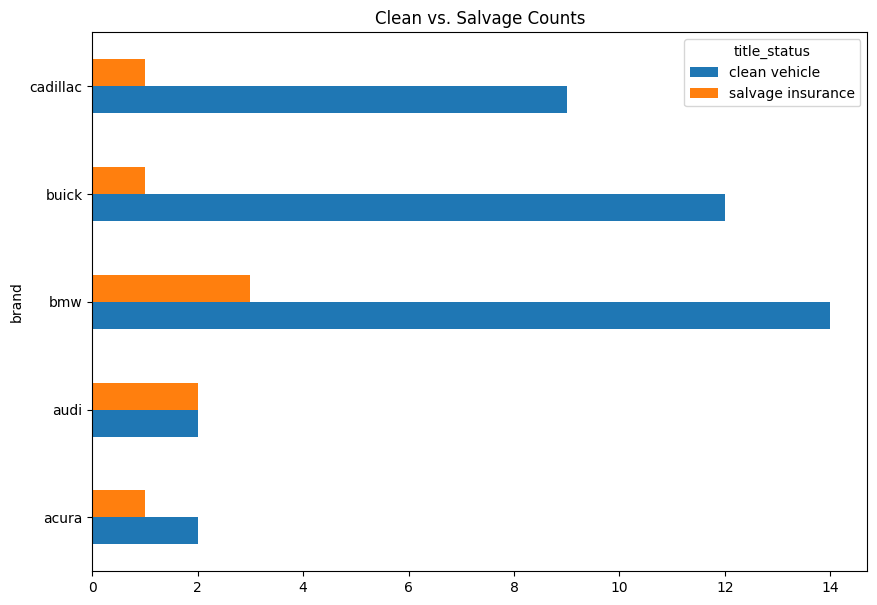

In [625]:
pd.pivot_table(cars,
               index = 'brand',
               columns = 'title_status',
               values = 'price',
               aggfunc = 'count').round(2).head(5).plot.barh(figsize = (10,7),
                                                             title = 'Clean vs. Salvage Counts');


In [626]:
# метод .unstack()

In [630]:
# Если применить к сводной таблице метод .unstack(), то мы как бы лишаем ее второго измерения, группировки по столбцам. Остается только группировка по строкам (как в методе .groupby).

In [629]:
# сравните результат исполнения этого кода с позапрошлым примером
pd.pivot_table(cars,
               index = 'brand',
               columns = 'title_status',
               values = 'price',
               aggfunc = 'median').round(2).head().unstack()

title_status       brand   
clean vehicle      acura       10400.0
                   audi        27950.0
                   bmw         31600.0
                   buick       20802.5
                   cadillac    24500.0
salvage insurance  acura        1000.0
                   audi           12.5
                   bmw          1825.0
                   buick           0.0
                   cadillac        0.0
dtype: float64

In [631]:
# создадим маску для автомобилей "БМВ" и сделаем копию датафрейма
bmw = cars[cars['brand'] == 'bmw'].copy()
# установим новый индекс, удалив при этом старый
bmw.reset_index(drop = True, inplace = True)
# удалим столбец brand, так как у нас осталась только одна марка
bmw.drop(columns = 'brand', inplace = True)
# посмотрим на результат
bmw.head()

,price,model,year,title_status,mileage,color,state,country
0,29400,x3,2017,clean vehicle,23765.0,black,tennessee,usa
1,24500,door,2017,clean vehicle,17626.0,gray,michigan,usa
2,53500,m,2017,clean vehicle,29355.0,blue,michigan,usa
3,39000,series,2016,clean vehicle,39917.0,blue,michigan,usa
4,40000,series,2016,clean vehicle,31727.0,gray,michigan,usa


In [632]:

# сгруппируем данные по штату и году выпуска, передав их в параметр index
# и найдем медианну цену
pd.pivot_table(bmw,
               index = ['state', 'year'],
               values = 'price',
               aggfunc = 'median').round(2)

price
state      year         
california 2017  39800.0
           2020  61200.0
florida    2013   2925.0
georgia    2008   1825.0
illinois   2014  15000.0
michigan   2016  39000.0
           2017  39000.0
new jersey 2014  13500.0
tennessee  2017  29400.0
texas      2011   6200.0
           2016  29700.0
utah       2000      0.0
wisconsin  2017  26600.0

In [634]:
# когда группировка выполняется только по строкам,
# мы можем получить аналогичный результат с помощью метода .groupby()
bmw.groupby(by = ['state', 'year'])[['price']].agg('median')

price
state      year         
california 2017  39800.0
           2020  61200.0
florida    2013   2925.0
georgia    2008   1825.0
illinois   2014  15000.0
michigan   2016  39000.0
           2017  39000.0
new jersey 2014  13500.0
tennessee  2017  29400.0
texas      2011   6200.0
           2016  29700.0
utah       2000      0.0
wisconsin  2017  26600.0

In [636]:
# выберем те штаты и годы выпуска, в которых медианная цена была выше 20000
pd.pivot_table(bmw,
               index = ['state', 'year'],
               values = 'price',
               aggfunc = 'median').round(2).query('price > 20000')

price
state      year         
california 2017  39800.0
           2020  61200.0
michigan   2016  39000.0
           2017  39000.0
tennessee  2017  29400.0
texas      2016  29700.0
wisconsin  2017  26600.0

In [641]:
# цвет в параметр color можно, в частности, передавать в hex-формате
pd.pivot_table(bmw,
               index = ['state', 'year'],
               values = 'price',
               aggfunc = 'median').round(2).style.bar(color = '#d22f9f')